In [1]:
import numpy as np
import jax
from jax.scipy import stats
import jax.numpy as jnp

import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
samples = jnp.load('banana.npz', allow_pickle=True)

In [3]:
ess = samples['ess_samples'].item()
atess = samples['atess_4x2_samples'].item()
nuts = samples['nuts_samples'].item()
neutra = samples['neutra_tanh_samples'].item()

In [4]:
def compare_plot_contour(logprob, ess, atess, nuts, neutra):
#     a, b, c, d = -6, 6, -5, 10
# #     a, b, c, d = -10, 10, -5, 20
#     x1 = jnp.linspace(a, b, 1000)
#     x2 = jnp.linspace(c, d, 1000)
#     y = jax.vmap(
#         jax.vmap(lambda x1, x2: jnp.exp(logprob({"x1": x1, "x2": x2})), (0, None)),
#         (None, 0),
#     )(x1, x2)
    clip = ((-8, 8), (-5, 15))
    x1 = np.random.normal(0., np.sqrt(8), size=10000)
    x2 = np.random.normal(1/4 * x1**2 , 1.)
    
    fig, ax = plt.subplots(1, 4, figsize=(17, 3), sharex=True, sharey=True)
    ax[0].set_title("(T)ESS samples")
    sns.kdeplot(x=x1, y=x2, ax=ax[0], color='k', clip=clip)
    sns.kdeplot(x=ess["x1"].reshape(-1), y=ess["x2"].reshape(-1), ax=ax[0], clip=clip)
#     ax[0].contour(x1, x2, y, levels=4, colors="k")
    ax[1].set_title("ATESS samples")
    sns.kdeplot(x=x1, y=x2, ax=ax[1], color='k', clip=clip)
    sns.kdeplot(x=atess["x1"].reshape(-1), y=atess["x2"].reshape(-1), ax=ax[1], clip=clip)
#     ax[1].contour(x1, x2, y, levels=4, colors="k")
    ax[2].set_title("NUTS samples")
    sns.kdeplot(x=x1, y=x2, ax=ax[2], color='k', clip=clip)
    sns.kdeplot(x=nuts["x1"].reshape(-1), y=nuts["x2"].reshape(-1), ax=ax[2], clip=clip)
#     ax[2].contour(x1, x2, y, levels=4, colors="k")
    ax[3].set_title("NeuTra samples")
    sns.kdeplot(x=x1, y=x2, ax=ax[3], color='k', clip=clip)
    sns.kdeplot(x=neutra["x1"].reshape(-1), y=neutra["x2"].reshape(-1), ax=ax[3], clip=clip)
#     ax[3].contour(x1, x2, y, levels=4, colors="k")

In [5]:
def banana(x1, x2):
    """Banana density"""
    return stats.norm.logpdf(x1, 0.0, jnp.sqrt(8.0)) + stats.norm.logpdf(
        x2, 1 / 4 * x1**2, 1.0
    )
banana_fn = lambda x: banana(**x)

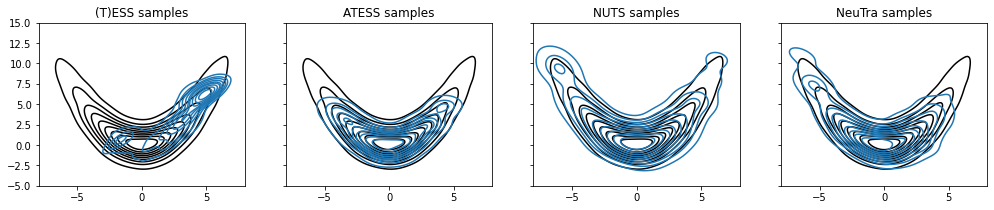

In [7]:
#new param 1x5k
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

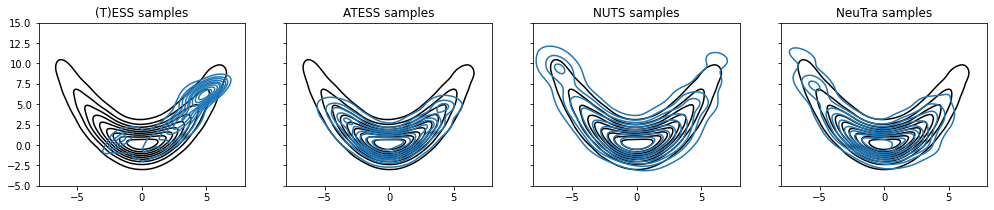

In [6]:
#new param 1x5k
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

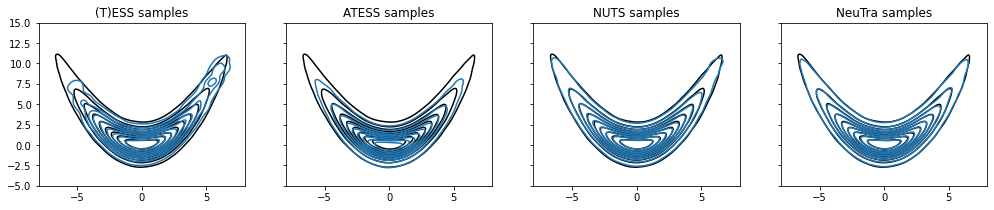

In [8]:
#new param
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

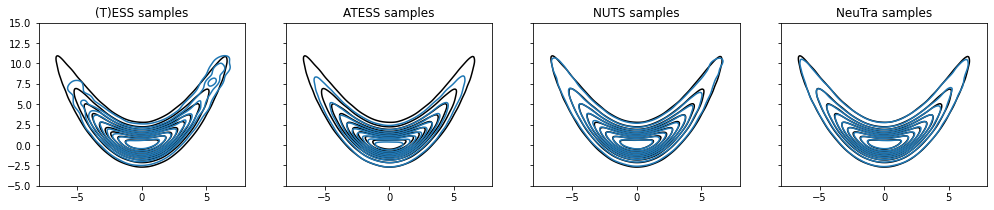

In [162]:
#same param
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)